In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
sys.path.insert(1, '../src')
from plant import Plant
from sun import Sun
from state import State
import utils
plt.rcParams['figure.figsize'] = [20, 10]

# Hypothetical Plant with Basic Layouts

In [4]:
hypo_plant = utils.load("../data/plants/hypo-plant.json")
basic_layout = utils.load("../data/layouts/theater-layout.json")['theater-layout']

plant = Plant(hypo_plant, basic_layout)
print(plant)

Hypothetical Plant: 

	- field area:
		- [x_min, x_max] = [0.00, 100.00]
		- [y_min, y_max] = [0.00, 20.00]
		- diameter = 101.98
		- max_ij = 101.98

	- receiver: 
		- _height = 50.00
		- _angle = 80.00
		- _size = 5.00

	- heliostats:
		- number of heliostats n = 20.00
		- heli_size = 3.00
		- heli_rays = 5.00
		- layout = [[0.00, 0.00], ..., [100.00, 20.00]]



In [5]:
plant.valid_layout

True

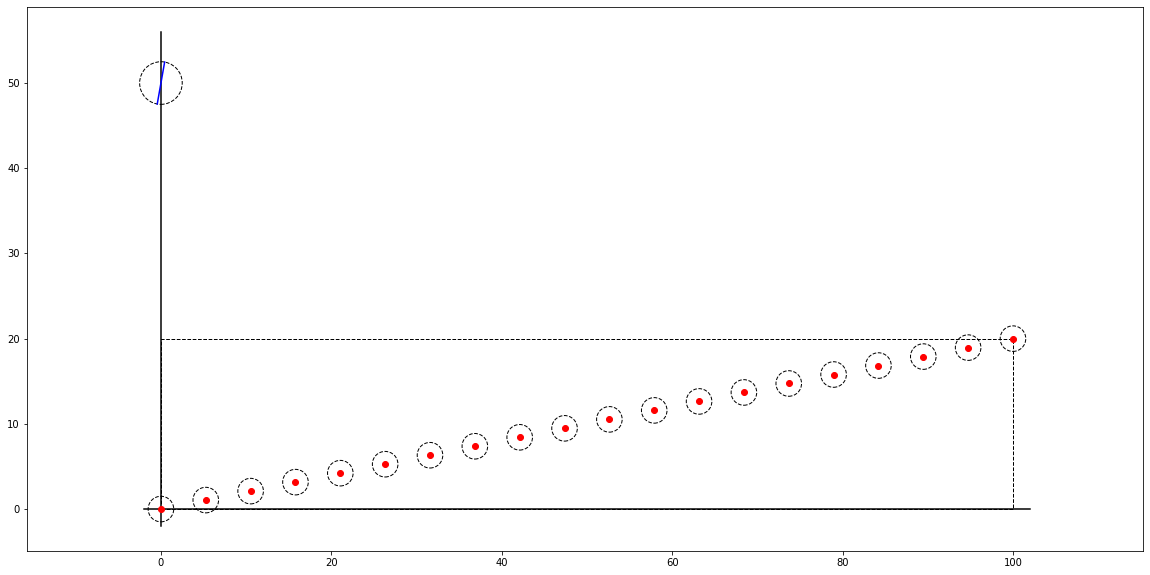

In [6]:
plant.draw()

Effects on heliostat 10: 

	* eta_aa = 0.987379
	* eta_cos = 0.956940
	* eta_sbm = 1.000000
	* received_rays / all_rays = 5 / 5
	* [not-shaded, not-blocked, not-missed] / all_rays = [5 5 5] / 5



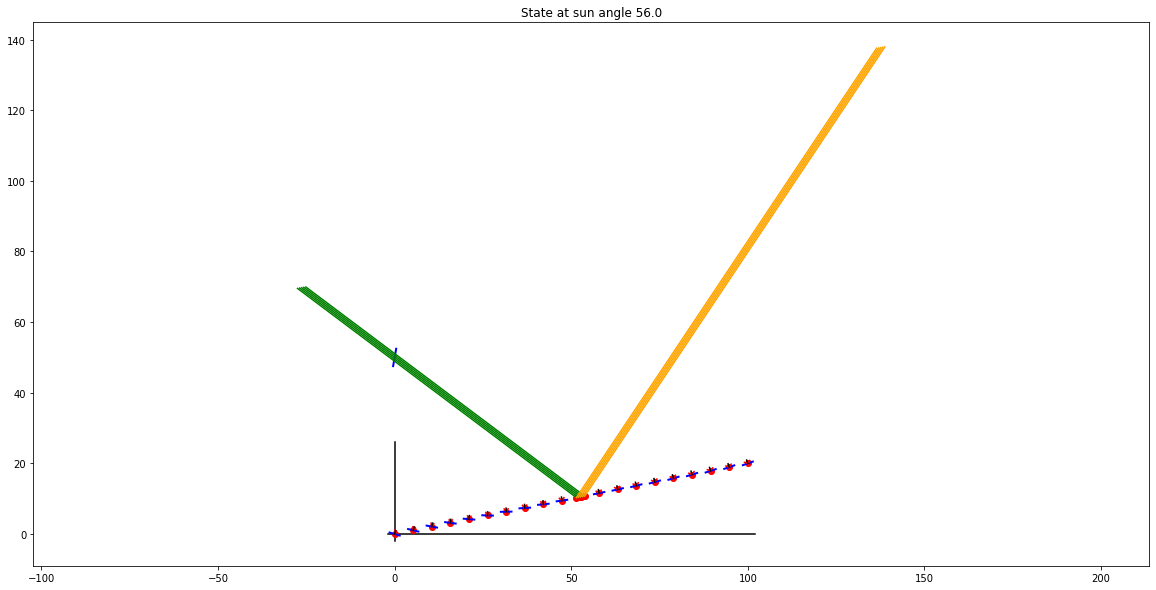

In [7]:
sun = Sun()
i = 10
state = State(plant, sun_angle=sun.angles[5])
effects = state.get_effects(i, verbose=True)
state.draw(i)

In [8]:
energy, stats_df, powers = utils.get_energy(plant, do_stats=True)


	- energy = 243.62269070867824893867

	         mu_aa   mu_cos  mu_sbm
	- etas:  0.9874, 0.8883, 0.8006

	         pi_sha  pi_blo  pi_mis
	- sbms:  0.1318, 0.0059, 0.0741



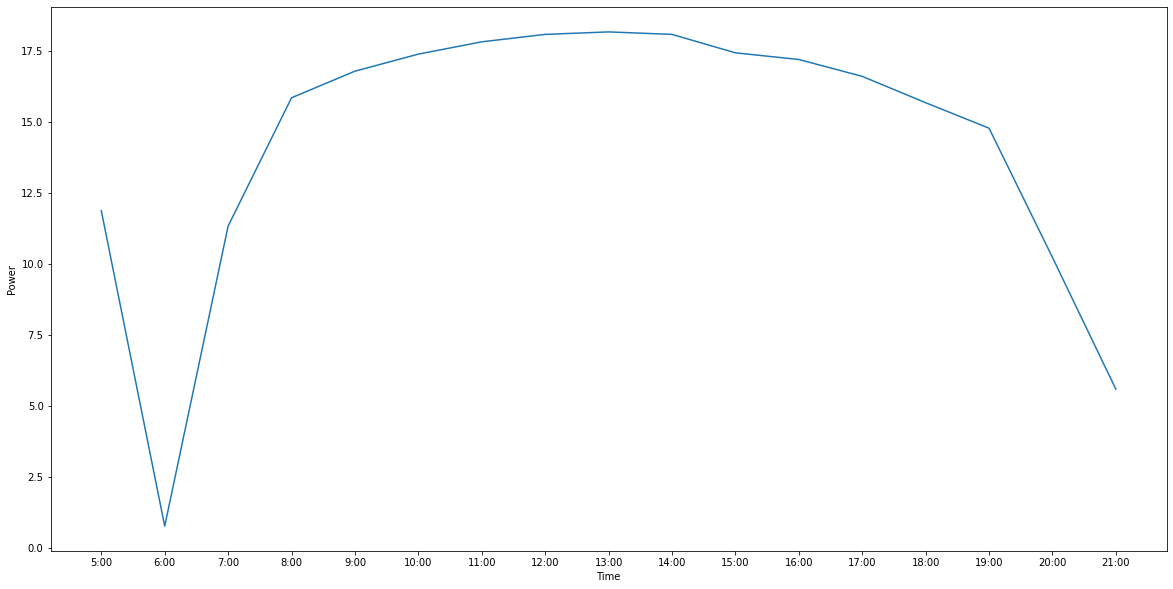

In [9]:
utils.draw(plant, powers)

In [10]:
stats_df

,time,power,mu_aa,mu_cos,mu_sbm,pi_sha,pi_blo,pi_mis
0,5:00,11.869104,0.987379,0.707107,0.85,0.13,0.00,0.04
1,6:00,0.763254,0.987379,0.773010,0.05,0.95,0.00,0.06
2,7:00,11.329467,0.987379,0.831470,0.69,0.28,0.00,0.06
3,8:00,15.848392,0.987379,0.881921,0.91,0.04,0.00,0.08
4,9:00,16.784838,0.987379,0.923880,0.92,0.00,0.00,0.08
5,10:00,17.385480,0.987379,0.956940,0.92,0.00,0.00,0.08
6,11:00,17.818689,0.987379,0.980785,0.92,0.00,0.00,0.08
7,12:00,18.080295,0.987379,0.995185,0.92,0.00,0.00,0.08
8,13:00,18.167778,0.987379,1.000000,0.92,0.00,0.00,0.08
9,14:00,18.080295,0.987379,0.995185,0.92,0.00,0.00,0.08
